# Classification
Classification adalah tipe Supervised Machine Learning untuk memberi label ke data. Kita latih dulu menggunakan data yang ada fitur dan target, targetnya berjenis label seperti contohnya:
- gambar angka 0,1,2,3,4,5,6,7,8,9
- sakit jantung / sehat
- rating bintang seller 1,2,3,4,5
- wine tipe A, B, C
- diterima / tidak

## Algoritma Model Classification
- Logistic Regression
- K-Nearest Neighbor
- Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)

## Evaluasi
performa sebuah model machine learning tipe classification bisa kita ukur lebih daripada skor R2 saja.

kita bisa buat confusion matrix dan classification performance.
1. Confusion Matrix adalah sebuah matrix (2D) dimana kita membandingkan data asli dengan data hasil prediksi.
2. Classification Performance adalah sebuah tabel yang merangkum keakuratan model Classification yang dibuat.


In [24]:
# import package disini
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

import seaborn as sns

# import package2 dari sklearn disini
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression

Text(0, 0.5, '0: sehat, 1: obesitas')

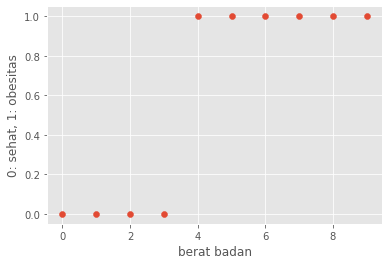

In [2]:
# siapkan data
# disini kita buat dummy data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

plt.scatter(x, y)
plt.xlabel("berat badan")
plt.ylabel("0: sehat, 1: obesitas")

In [3]:
# data preparation
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

In [4]:
# membuat dan melatih model
model = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)

In [5]:
# evaluasi
y_pred = model.predict(x)

print(classification_report(y, y_pred))

print(confusion_matrix(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

[[3 1]
 [0 6]]


In [6]:
# tuning

In [7]:
# detail model Logistic Regression
print(model.classes_) # model LogisticRegression ini akan memprediksi label apa saja?
print(model.intercept_, model.coef_) # intercept dan coefficient digunakan di formulai matematik yang membuat garis regression

[0 1]
[-1.04608067] [[0.51491375]]


In [8]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [9]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [10]:
y_proba = model.predict_proba(x).T[1]
y_proba

array([0.25997843, 0.37024476, 0.4959368 , 0.62214451, 0.73371907,
       0.82178499, 0.88527921, 0.92813018, 0.95577487, 0.97309431])

Text(0.5, 1.0, 'Logistic Regression')

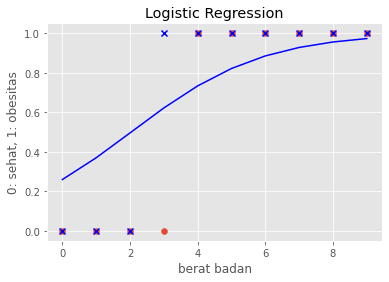

In [11]:
# visualisasi
model = LogisticRegression(solver="liblinear", random_state=0).fit(x, y)
y_pred = model.predict(x)
y_proba = model.predict_proba(x).T[1]

plt.scatter(x, y)
plt.xlabel("berat badan")
plt.ylabel("0: sehat, 1: obesitas")

plt.scatter(x, y_pred, color="blue", marker="x")
plt.plot(x, y_proba, color="blue")
plt.title("Logistic Regression")

# Logistic Regression - Digits dataset
kita akan load data gambar tulisan tangan untuk angka 0-9, lalu kita buat model Machine Learning tipe LogisticRegression untuk menprediksi gambar apakah tulisannya angka 0-9

In [12]:
# siapkan data
digits = load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
digits.data.shape

(1797, 64)

In [14]:
len(digits.feature_names) # setiap baris data adalah sebuah gambar dengan 64 pixel

64

In [15]:
len(digits.target)

1797

Text(0.5, 1.0, '1')

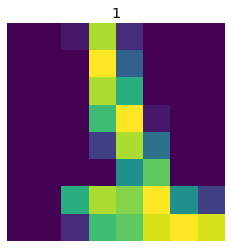

In [16]:
# data ini adalah gambar 8x8 pixel
# kita bisa recreate gambarnya dari numpy array nya kalau mau
n = 1000
satu_gambar = digits.data[n].reshape((8,8))
plt.imshow(satu_gambar)
plt.axis("off")
plt.title(digits.target[n])

In [17]:
pd.DataFrame(data=digits.data).isnull().sum().sum() # tidak ada missing value

0

In [18]:
# persiapkan data
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

# datanya kita split jadi training dan testing data
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.2)

print(x_train.shape, x_test.shape)

(1437, 64) (360, 64)


In [19]:
# buat dan latih model
model = LogisticRegression(solver="newton-cg", random_state=0).fit(x_train, y_train)

# evaluasi
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.95      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  2  1]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0

In [20]:
# buat cm jadi visual
def visualizeCM(cm, nolabels):    
    fig, ax = plt.subplots(figsize=(nolabels, nolabels))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs', color='black')
    ax.xaxis.set(ticks=range(nolabels))
    ax.yaxis.set(ticks=range(nolabels))
    ax.set_ylim(nolabels-0.5, -0.5)
    for i in range(nolabels):
        for j in range(nolabels):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()

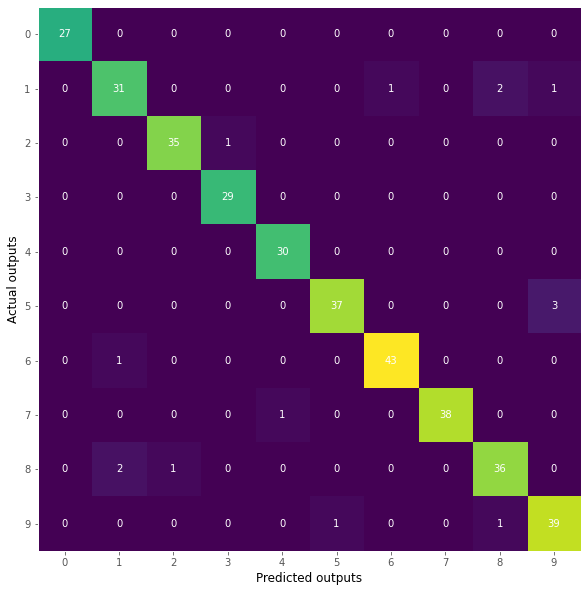

In [21]:
visualizeCM(confusion_matrix(y_test, y_pred), 10)

# K-Nearest Neighbor


In [25]:
# siapkan data
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

df = pd.DataFrame({"weather":weather, "temperature":temp, "play":play})
df

,weather,temperature,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [30]:
# data preparation
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

# encoding, mengubah data tipe string jadi angka
encoder = LabelEncoder()

df["weather_en"] = encoder.fit_transform(df["weather"])
print("Class untuk weather:", encoder.classes_)

df["temp_en"] = encoder.fit_transform(df["temperature"])
print("Class untuk temperature:", encoder.classes_)

df["play_en"] = encoder.fit_transform(df["play"])
print("Class untuk play:", encoder.classes_)

display(df)

Class untuk weather: ['Overcast' 'Rainy' 'Sunny']
Class untuk temperature: ['Cool' 'Hot' 'Mild']
Class untuk play: ['No' 'Yes']


,weather,temperature,play,weather_en,temp_en,play_en
0,Sunny,Hot,No,2,1,0
1,Sunny,Hot,No,2,1,0
2,Overcast,Hot,Yes,0,1,1
3,Rainy,Mild,Yes,1,2,1
4,Rainy,Cool,Yes,1,0,1
5,Rainy,Cool,No,1,0,0
6,Overcast,Cool,Yes,0,0,1
7,Sunny,Mild,No,2,2,0
8,Sunny,Cool,Yes,2,0,1
9,Rainy,Mild,Yes,1,2,1


In [32]:
features = df[["weather_en", "temp_en"]]
target = df["play_en"]

In [33]:
# membuat dan melatih model
model = KNeighborsClassifier().fit(features, target)

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



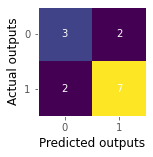

In [34]:
# evaluasi
y_pred = model.predict(features)
print(classification_report(target, y_pred))

visualizeCM(confusion_matrix(target, y_pred), 2)

KNN dengan 1 neighbor
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.80      0.89      0.84         9

    accuracy                           0.79        14
   macro avg       0.78      0.74      0.75        14
weighted avg       0.78      0.79      0.78        14



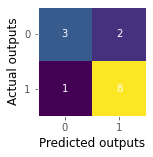

In [42]:
# KNN kita bisa pilih jumlah neighbor
n=1
print("KNN dengan", n, "neighbor")
model = KNeighborsClassifier(n_neighbors = n).fit(features, target)

y_pred = model.predict(features)
print(classification_report(target, y_pred))
visualizeCM(confusion_matrix(target, y_pred), 2)

In [49]:
# jadi jumlah neighbor biar paling akurat carinya gmn?
# kita bisa bikin plot untuk setiap jumlah neighbor, akurasi modelnya berapa
def knnTable(maxK, features, target):
    list_skor = []
    for n in range(1, maxK):
        model = KNeighborsClassifier(n_neighbors = n).fit(features, target)
        skor = model.score(features, target)

        # print("KNN dengan", n, "neighbor skornya:", skor)
        list_skor.append(skor)

    plt.plot(range(1,maxK), list_skor, marker="o")
    plt.xlabel("K jumlah neighbor")
    plt.ylabel("Accuracy Score")
    plt.title("KNN score vs K table")

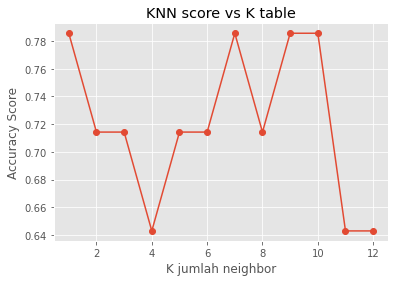

In [51]:
knnTable(13, features, target)

# KNN dengan data_wine

In [54]:
# siapin data
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine["label"] = wine.target

In [58]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [55]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [59]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

In [60]:
# data preparation
# missing value, invalid value, tipe data, 
# encoding, scaling, split jadi training dan testing data

# split data jadi training dan testing dataset
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=0, test_size=0.2)

print(x_train.shape, x_test.shape)

(142, 13) (36, 13)


In [64]:
def knnTableTrainTest(maxK, x_train, y_train, x_test, y_test):
    list_skor = []
    for n in range(1, maxK):
        model = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
        skor = model.score(x_test, y_test)

        # print("KNN dengan", n, "neighbor skornya:", skor)
        list_skor.append(skor)

    plt.plot(range(1,maxK), list_skor, marker="o")
    plt.xlabel("K jumlah neighbor")
    plt.ylabel("Accuracy Score")
    plt.title("KNN score vs K table")

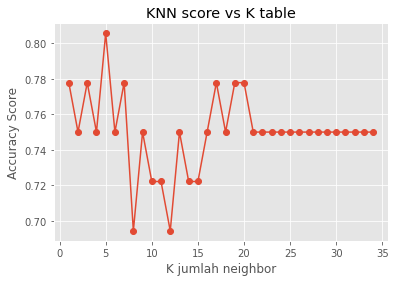

In [65]:
# buat model
# pilih jumlah K dulu
knnTableTrainTest(35, x_train, y_train, x_test, y_test)

In [68]:
# buat dan latih model
model = KNeighborsClassifier(n_neighbors=21).fit(x_train, y_train)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.79      0.69      0.73        16
           2       0.33      0.50      0.40         6

    accuracy                           0.75        36
   macro avg       0.71      0.71      0.70        36
weighted avg       0.79      0.75      0.77        36



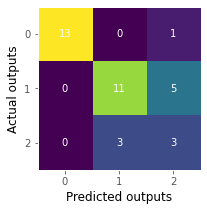

In [70]:
# evaluasi model
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))

visualizeCM(confusion_matrix(y_test, y_pred), 3)